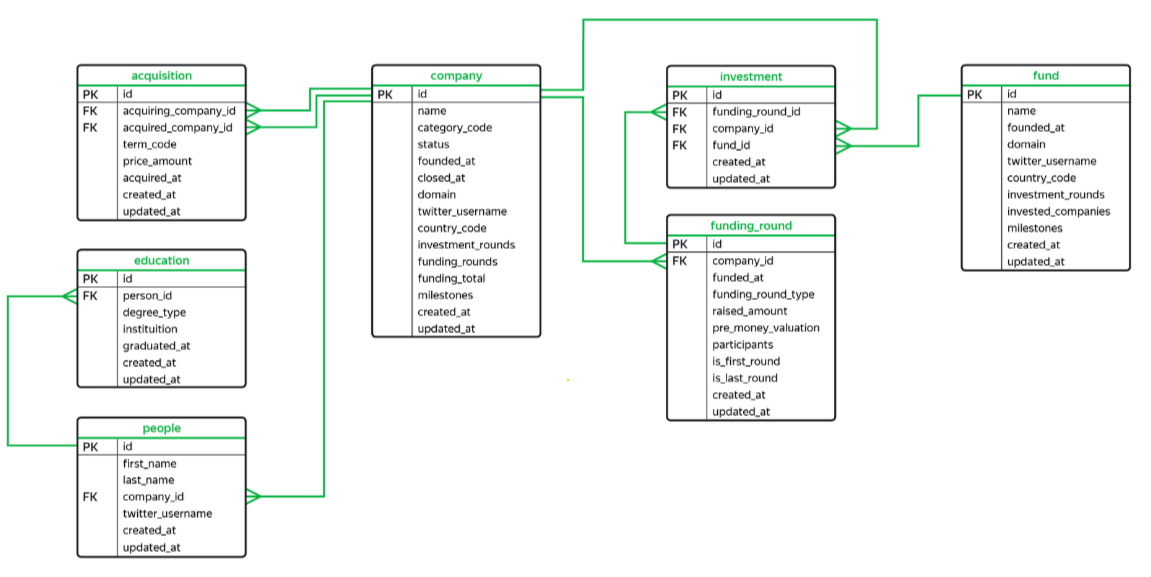

1.
Посчитайте, сколько компаний закрылось.

In [ ]:
SELECT COUNT(status)
FROM company
WHERE status LIKE '%closed%'

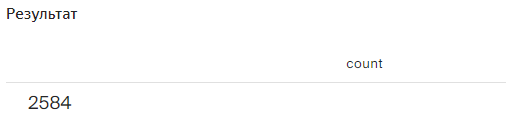

2.
Отобразите количество привлечённых средств для новостных компаний США. Используйте данные из таблицы company. Отсортируйте таблицу по убыванию значений в поле funding_total .

In [ ]:
SELECT funding_total
FROM company
WHERE category_code LIKE '%news%'
      AND country_code LIKE '%USA%'
GROUP BY name, funding_total      
ORDER BY funding_total DESC;

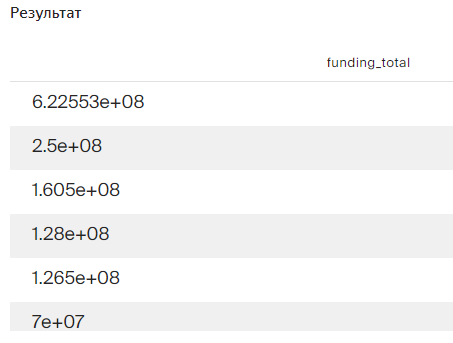

3.
Найдите общую сумму сделок по покупке одних компаний другими в долларах. Отберите сделки, которые осуществлялись только за наличные с 2011 по 2013 год включительно.

In [ ]:
SELECT SUM(price_amount)
FROM acquisition
WHERE EXTRACT(YEAR FROM CAST(acquired_at AS date)) BETWEEN 2011 AND 2013
      AND term_code LIKE 'cash';

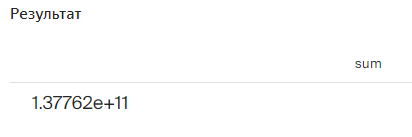

4.
Отобразите имя, фамилию и названия аккаунтов людей в твиттере, у которых названия аккаунтов начинаются на 'Silver'.

In [ ]:
SELECT first_name,
       last_name,
       twitter_username
FROM people
WHERE twitter_username LIKE 'Silver%'

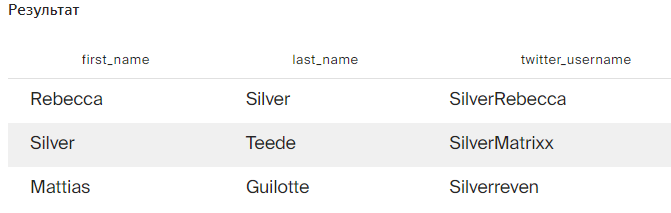

5.
Выведите на экран всю информацию о людях, у которых названия аккаунтов в твиттере содержат подстроку 'money', а фамилия начинается на 'K'.

In [ ]:
SELECT *
FROM people
WHERE twitter_username LIKE '%money%'
      AND last_name LIKE 'K%'

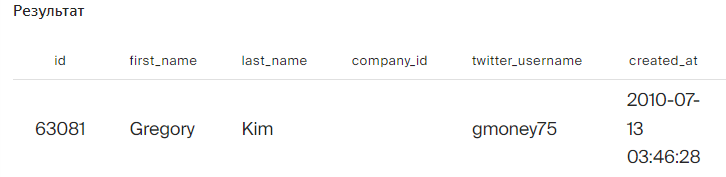

6.
Для каждой страны отобразите общую сумму привлечённых инвестиций, которые получили компании, зарегистрированные в этой стране. Страну, в которой зарегистрирована компания, можно определить по коду страны. Отсортируйте данные по убыванию суммы.

In [ ]:
SELECT country_code AS country,
       SUM(funding_total) AS total
FROM company
GROUP BY country
ORDER BY total DESC;

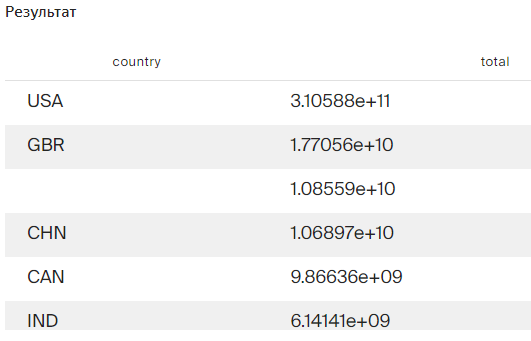

7.
Составьте таблицу, в которую войдёт дата проведения раунда, а также минимальное и максимальное значения суммы инвестиций, привлечённых в эту дату.
Оставьте в итоговой таблице только те записи, в которых минимальное значение суммы инвестиций не равно нулю и не равно максимальному значению.

In [ ]:
SELECT CAST(funded_at AS date) AS date,
       MIN(raised_amount) AS min_total,
       MAX(raised_amount) AS max_total
FROM funding_round
GROUP BY date
HAVING MIN(raised_amount) <> 0
       AND MIN(raised_amount) <> MAX(raised_amount)
ORDER BY date DESC, min_total, max_total;

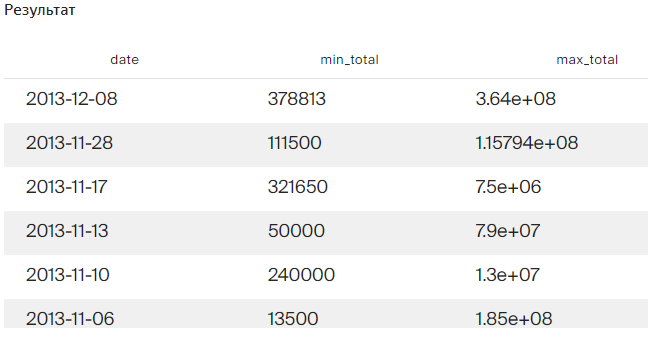

8.
Создайте поле с категориями:
Для фондов, которые инвестируют в 100 и более компаний, назначьте категорию high_activity.
Для фондов, которые инвестируют в 20 и более компаний до 100, назначьте категорию middle_activity.
Если количество инвестируемых компаний фонда не достигает 20, назначьте категорию low_activity.
Отобразите все поля таблицы fund и новое поле с категориями.

In [ ]:
SELECT  *,
        CASE
            WHEN invested_companies > 100 THEN 'high_activity'
            WHEN invested_companies BETWEEN 20 AND 100 THEN 'middle_activity'
            WHEN invested_companies < 20 THEN 'low_activity'
        END
FROM fund;

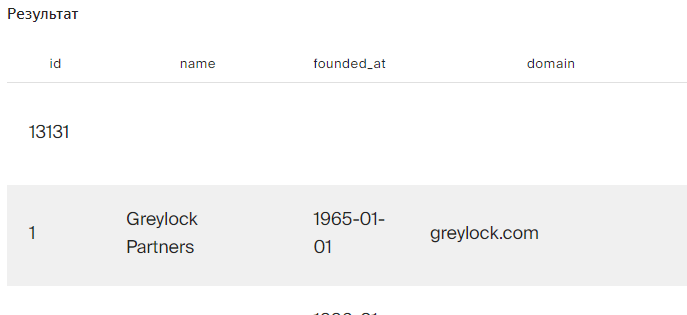

9.
Для каждой из категорий, назначенных в предыдущем задании, посчитайте округлённое до ближайшего целого числа среднее количество инвестиционных раундов, в которых фонд принимал участие. Выведите на экран категории и среднее число инвестиционных раундов. Отсортируйте таблицу по возрастанию среднего.

In [ ]:
SELECT 
       CASE
           WHEN invested_companies>=100 THEN 'high_activity'
           WHEN invested_companies>=20 THEN 'middle_activity'
           ELSE 'low_activity'
       END AS activity,
       ROUND(AVG(investment_rounds)) AS average_rounds
FROM fund
GROUP BY activity
ORDER BY average_rounds;

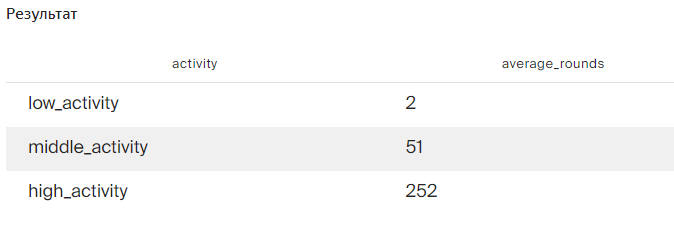

10.
Проанализируйте, в каких странах находятся фонды, которые чаще всего инвестируют в стартапы. 
Для каждой страны посчитайте минимальное, максимальное и среднее число компаний, в которые инвестировали фонды этой страны, основанные с 2010 по 2012 год включительно. Исключите страны с фондами, у которых минимальное число компаний, получивших инвестиции, равно нулю. Выгрузите десять самых активных стран-инвесторов.
Отсортируйте таблицу по среднему количеству компаний от большего к меньшему, а затем по коду страны в лексикографическом порядке.

In [ ]:
SELECT country_code,
       MIN(invested_companies),
       MAX(invested_companies),
       AVG(invested_companies)
FROM fund
WHERE EXTRACT(YEAR FROM CAST(founded_at as date)) BETWEEN 2010 AND 2012
GROUP BY country_code
HAVING MIN(invested_companies) > 0
ORDER BY AVG(invested_companies) DESC
LIMIT 10;

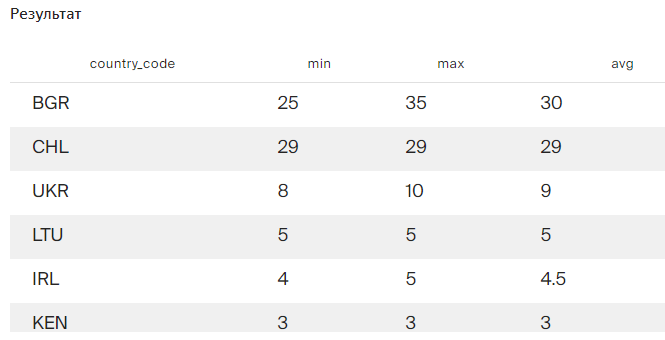

11.
Отобразите имя и фамилию всех сотрудников стартапов. Добавьте поле с названием учебного заведения, которое окончил сотрудник, если эта информация известна.

In [ ]:
SELECT first_name,
       last_name,
       instituition
FROM people AS p
LEFT JOIN education AS e ON p.id = e.person_id

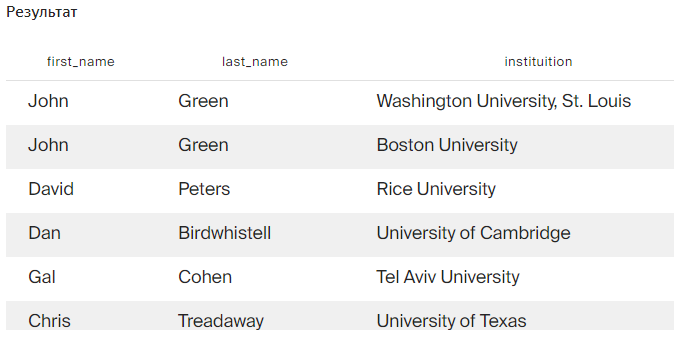

12.
Для каждой компании найдите количество учебных заведений, которые окончили её сотрудники. Выведите название компании и число уникальных названий учебных заведений. Составьте топ-5 компаний по количеству университетов.

In [ ]:
SELECT c.name AS company,
       COUNT(DISTINCT instituition) AS instituition
FROM company AS c
INNER JOIN people AS p ON c.id = p.company_id
INNER JOIN education AS e ON p.id = e.person_id
GROUP BY company
ORDER BY instituition DESC
LIMIT 5;

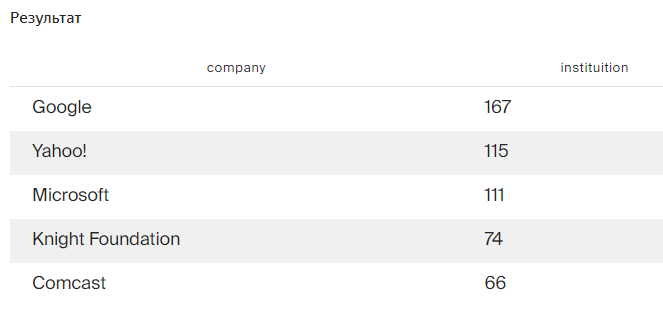

13.
Составьте список с уникальными названиями закрытых компаний, для которых первый раунд финансирования оказался последним.


In [ ]:
SELECT c.name
FROM company AS c
LEFT JOIN funding_round AS f ON c.id = f.company_id
WHERE c.status = 'closed'
      AND f.is_first_round = 1
      AND f.is_last_round = 1
GROUP BY c.name

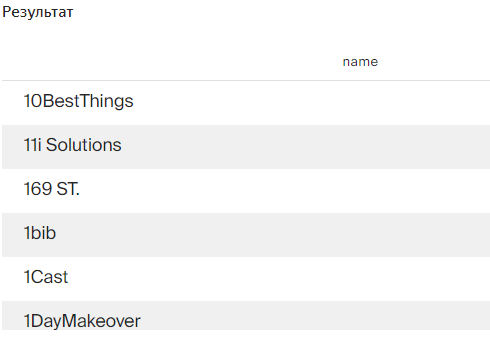

14.
Составьте список уникальных номеров сотрудников, которые работают в компаниях, отобранных в предыдущем задании.

In [ ]:
SELECT p.id
FROM people AS p
LEFT JOIN company AS c ON p.company_id = c.id
WHERE c.id IN (SELECT c.id
              FROM company AS c
              LEFT JOIN funding_round AS f ON c.id = f.company_id
              WHERE c.status = 'closed'
                    AND f.is_first_round = 1
                    AND f.is_last_round = 1
              GROUP BY c.id)
GROUP BY p.id

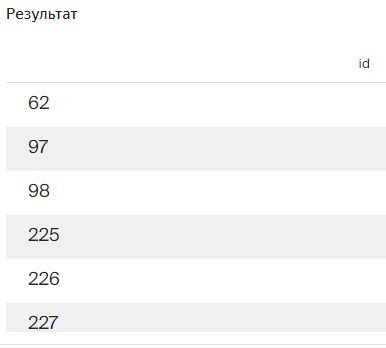

15.
Составьте таблицу, куда войдут уникальные пары с номерами сотрудников из предыдущей задачи и учебным заведением, которое окончил сотрудник.

In [ ]:
SELECT e.person_id,
       e.instituition   
FROM education AS e
WHERE person_id IN (SELECT p.id
                   FROM people AS p
                   LEFT JOIN company AS c ON p.company_id = c.id
                   WHERE c.id IN (SELECT c.id
                             FROM company AS c
                             LEFT JOIN funding_round AS f ON c.id = f.company_id
                             WHERE c.status = 'closed'
                                   AND f.is_first_round = 1
                                   AND f.is_last_round = 1
                             GROUP BY c.id) 
               GROUP BY p.id)
GROUP BY e.person_id, e.instituition;

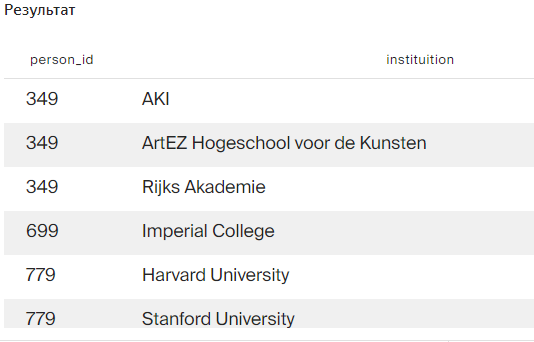

16.
Посчитайте количество учебных заведений для каждого сотрудника из предыдущего задания. При подсчёте учитывайте, что некоторые сотрудники могли окончить одно и то же заведение дважды.

In [ ]:
SELECT DISTINCT e.person_id AS person,
       COUNT(e.instituition)
FROM education AS e
WHERE person_id IN (SELECT p.id
                   FROM people AS p
                   LEFT JOIN company AS c ON p.company_id = c.id
                   WHERE c.id IN (SELECT c.id
                             FROM company AS c
                             LEFT JOIN funding_round AS f ON c.id = f.company_id
                             WHERE c.status = 'closed'
                                   AND f.is_first_round = 1
                                   AND f.is_last_round = 1
                             GROUP BY c.id) 
               GROUP BY p.id)
GROUP BY person;

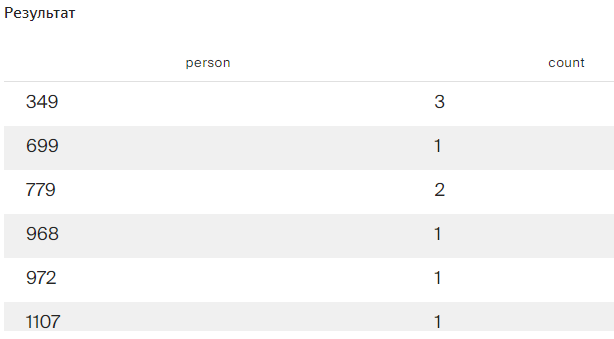

17.
Дополните предыдущий запрос и выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники разных компаний. Нужно вывести только одну запись, группировка здесь не понадобится.

In [ ]:
SELECT AVG(count)
FROM
    (SELECT DISTINCT e.person_id AS person,
           COUNT(e.instituition) AS count
    FROM education AS e
    WHERE person_id IN (SELECT p.id
                       FROM people AS p
                       LEFT JOIN company AS c ON p.company_id = c.id
                       WHERE c.id IN (SELECT c.id
                                 FROM company AS c
                                 LEFT JOIN funding_round AS f ON c.id = f.company_id
                                 WHERE c.status = 'closed'
                                       AND f.is_first_round = 1
                                       AND f.is_last_round = 1
                                 GROUP BY c.id) 
                   GROUP BY p.id)
    GROUP BY person) AS instituition

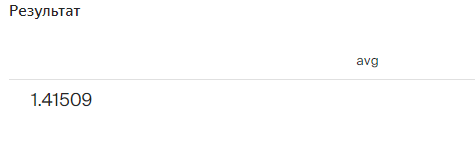

18.
Напишите похожий запрос: выведите среднее число учебных заведений (всех, не только уникальных), которые окончили сотрудники Facebook*.
*(сервис, запрещённый на территории РФ)

In [ ]:
SELECT *
FROM 
    (SELECT avg(count)
    FROM
        (SELECT DISTINCT e.person_id AS person,
                COUNT(e.instituition) AS count
        FROM education AS e
        WHERE person_id IN (SELECT p.id
                           FROM people AS p
                           LEFT JOIN company AS c ON p.company_id = c.id
                           WHERE c.id IN (SELECT c.id
                                         FROM company AS c
                                         LEFT JOIN funding_round AS f ON c.id = f.company_id
                                         WHERE c.name = 'Facebook'
                                         GROUP BY c.id)
                           GROUP BY p.id)         
      GROUP BY person) AS instituition) AS mean

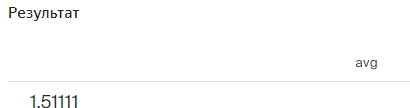

19.
Составьте таблицу из полей:
name_of_fund — название фонда;
name_of_company — название компании;
amount — сумма инвестиций, которую привлекла компания в раунде.
В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
SELECT f.name AS name_of_fund,
       c.name AS name_of_company,
       fr.raised_amount AS amount
FROM investment AS i
INNER JOIN company AS c ON i.company_id = c.id
INNER JOIN fund AS f ON i.fund_id = f.id
INNER JOIN funding_round AS fr ON i.funding_round_id = fr.id
WHERE EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2012 AND 2013
      AND c.milestones > 6
GROUP BY name_of_fund, name_of_company, amount

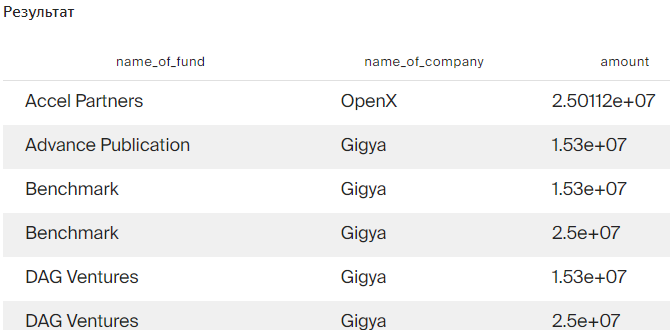

20.
Выгрузите таблицу, в которой будут такие поля:
название компании-покупателя;
сумма сделки;
название компании, которую купили;
сумма инвестиций, вложенных в купленную компанию;
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы. 
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в лексикографическом порядке. Ограничьте таблицу первыми десятью записями.

In [ ]:
SELECT c_1.name AS ag_company,
       a.price_amount,
       c_2.name AS ad_company,
       c_2.funding_total,
       ROUND(a.price_amount / c_2.funding_total)
FROM acquisition AS a
LEFT JOIN company AS c_1 ON a.acquiring_company_id = c_1.id
LEFT JOIN company AS c_2 ON a.acquired_company_id = c_2.id
WHERE a.price_amount > 0
      AND c_2.funding_total > 0
ORDER BY a.price_amount DESC, ad_company
LIMIT 10;

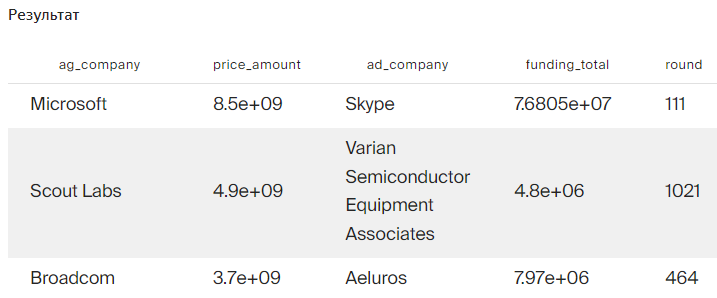

21.
Выгрузите таблицу, в которую войдут названия компаний из категории social, получившие финансирование с 2010 по 2013 год включительно. Проверьте, что сумма инвестиций не равна нулю. Выведите также номер месяца, в котором проходил раунд финансирования.

In [ ]:
SELECT c.name,
       EXTRACT(MONTH FROM CAST(fr.funded_at AS date))
FROM company AS c
LEFT JOIN funding_round AS fr ON c.id = fr.company_id
WHERE EXTRACT(YEAR FROM CAST(fr.funded_at AS date)) BETWEEN 2010 AND 2013
      AND c.category_code = 'social'
      AND fr.raised_amount <> 0;

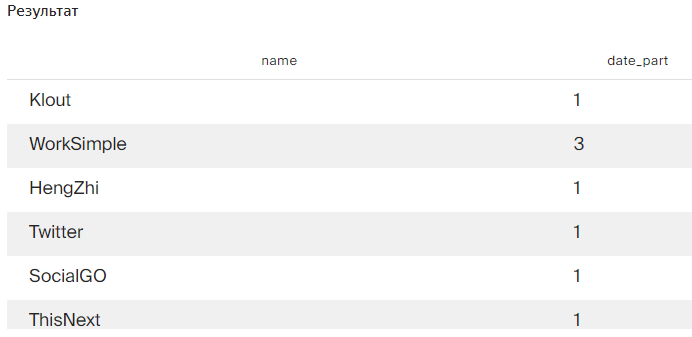

22.
Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
номер месяца, в котором проходили раунды;
количество уникальных названий фондов из США, которые инвестировали в этом месяце;
количество компаний, купленных за этот месяц;
общая сумма сделок по покупкам в этом месяце.

In [ ]:
WITH 
fundings AS
    (SELECT EXTRACT(MONTH FROM CAST(fr.funded_at AS DATE)) AS funding_month,
    COUNT(DISTINCT f.id) AS us_funds
    FROM fund AS f
    LEFT JOIN investment AS i ON f.id = i.fund_id
    LEFT JOIN funding_round AS fr ON i.funding_round_id = fr.id
    WHERE f.country_code = 'USA'
    AND EXTRACT(YEAR FROM CAST(fr.funded_at AS DATE)) BETWEEN 2010 AND 2013
    GROUP BY funding_month),
acquisitions AS
    (SELECT EXTRACT(MONTH FROM CAST(acquired_at AS DATE)) AS funding_month,
    COUNT(acquired_company_id) AS bought_co,
    SUM(price_amount) AS sum_total
    FROM acquisition
    WHERE EXTRACT(YEAR FROM CAST(acquired_at AS DATE)) BETWEEN 2010 AND 2013
    GROUP BY funding_month)
SELECT fnd.funding_month, fnd.us_funds, acq.bought_co, acq.sum_total
FROM fundings AS fnd
LEFT JOIN acquisitions AS acq ON fnd.funding_month = acq.funding_month;

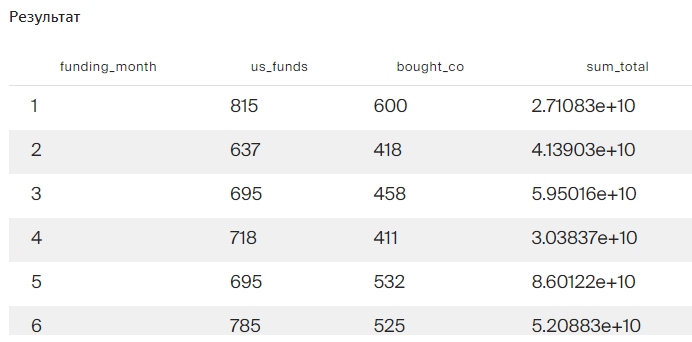

23.
Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH 
y_11 AS
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2011
    FROM company
    WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) IN (2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2011'),
y_12 AS
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2012
    FROM company
    WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) IN (2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2012'),
y_13 AS
    (SELECT country_code AS country,
    AVG(funding_total) AS y_2013
    FROM company
    WHERE EXTRACT(YEAR FROM CAST(founded_at AS date)) IN (2011, 2012, 2013)
    GROUP BY country, EXTRACT(YEAR FROM founded_at)
    HAVING EXTRACT(YEAR FROM founded_at) = '2013')
SELECT y_11.country, y_2011, y_2012, y_2013
FROM y_11
JOIN y_12 ON y_11.country = y_12.country
JOIN y_13 ON y_12.country = y_13.country
ORDER BY y_2011 DESC;

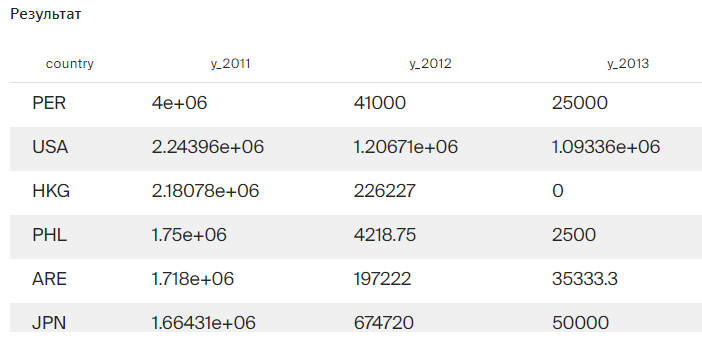